In [17]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


In [20]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df = pd.get_dummies(df, drop_first=True)


In [22]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:")
print(ridge.coef_)


Ridge Coefficients:
[ 2.56782216e+02  3.36877819e+02  4.25798686e+02 -1.06683261e+01
  2.35150895e+04 -3.66407914e+02 -6.44135484e+02 -8.03575305e+02]


In [25]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Lasso Coefficients:")
print(lasso.coef_)


Lasso Coefficients:
[ 2.56974934e+02  3.37070238e+02  4.25208802e+02 -1.81397783e+01
  2.36504932e+04 -3.69059930e+02 -6.56168800e+02 -8.08161769e+02]


In [26]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

coef_df


,Feature,Ridge,Lasso
0,age,256.782216,256.974934
1,bmi,336.877819,337.070238
2,children,425.798686,425.208802
3,sex_male,-10.668326,-18.139778
4,smoker_yes,23515.089451,23650.493235
5,region_northwest,-366.407914,-369.059930
6,region_southeast,-644.135484,-656.168800
7,region_southwest,-803.575305,-808.161769


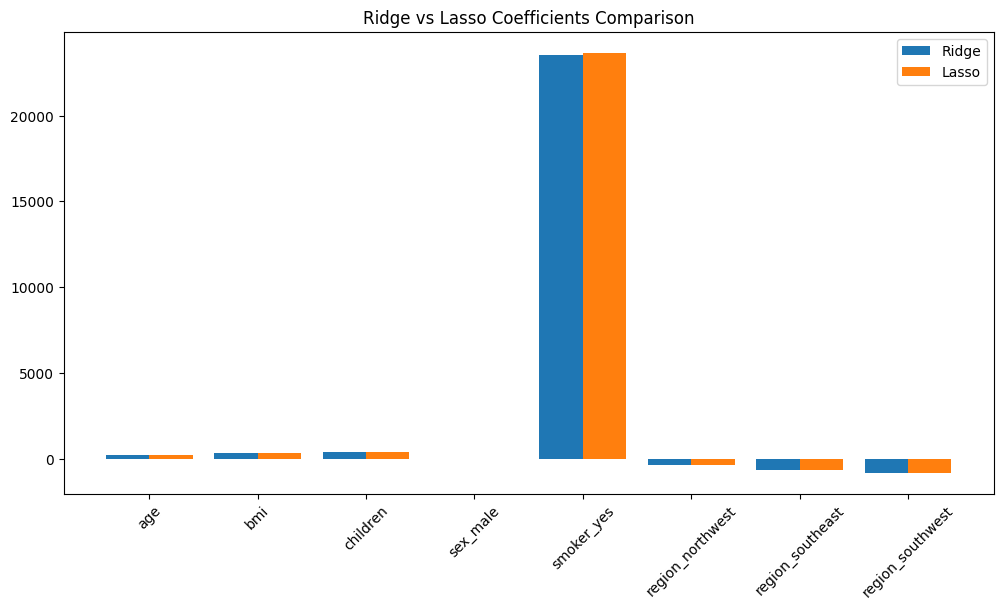

In [27]:
import matplotlib.pyplot as plt
import numpy as np

features = X.columns
x = np.arange(len(features))

plt.figure(figsize=(12,6))
plt.bar(x-0.2, ridge.coef_, width=0.4, label="Ridge")
plt.bar(x+0.2, lasso.coef_, width=0.4, label="Lasso")

plt.xticks(x, features, rotation=45)
plt.legend()
plt.title("Ridge vs Lasso Coefficients Comparison")
plt.show()
